In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Collect or Load data

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Basic Check

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include='object')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 3. EDA

In [14]:
num_cols = df.select_dtypes('number')
num_cols

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


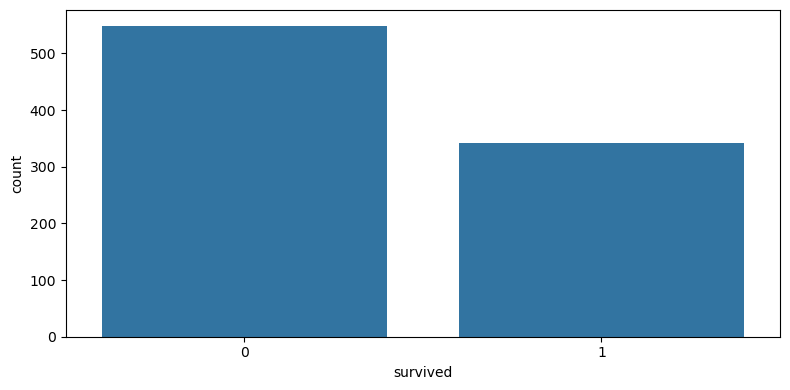

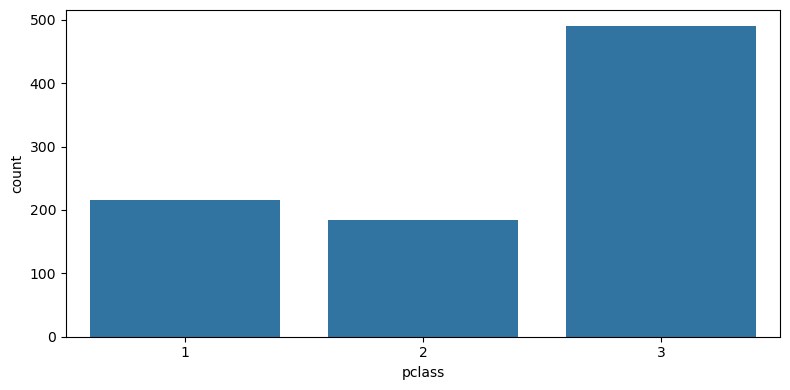

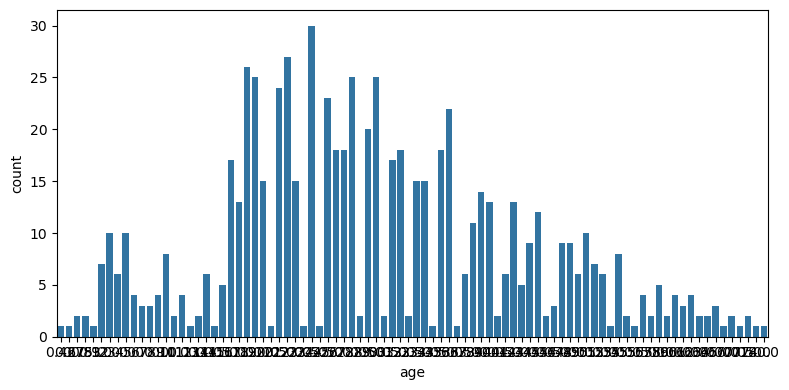

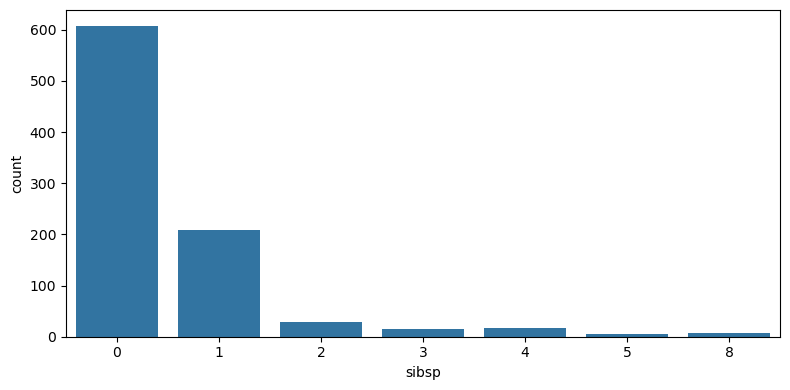

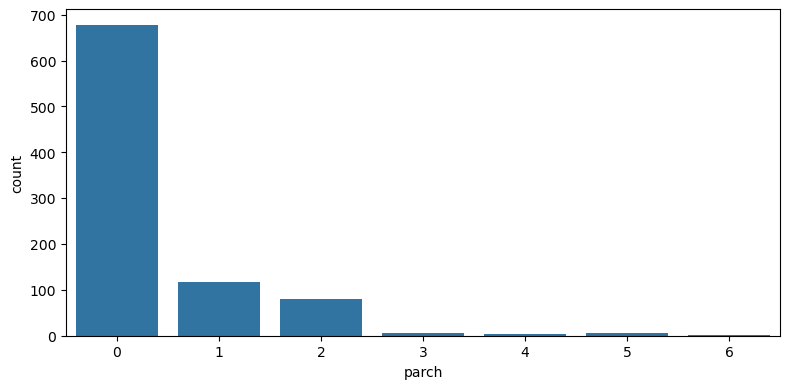

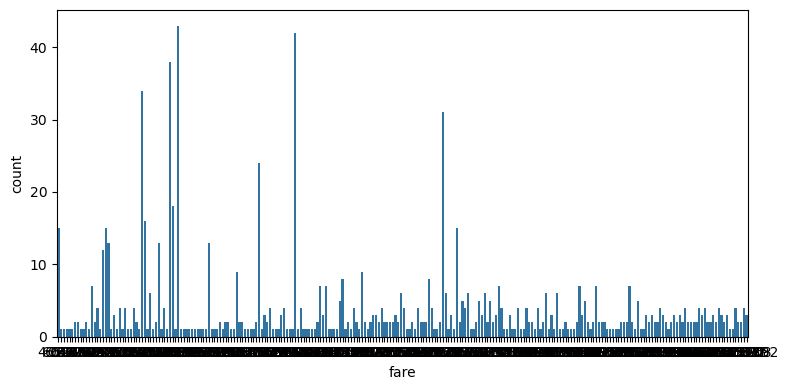

In [28]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,data = df)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='fare', ylabel='Count'>

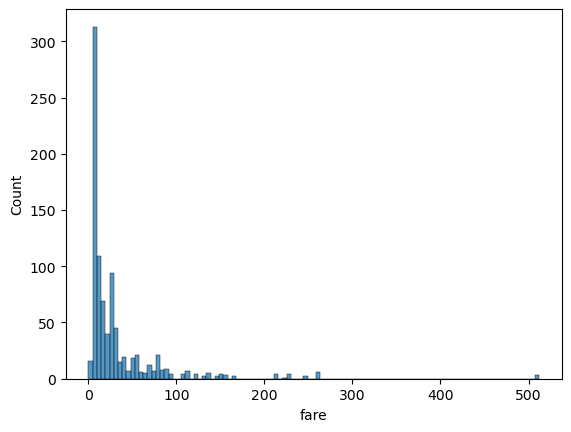

In [29]:
sns.histplot(x=df['fare'], data=df)

<Axes: xlabel='age', ylabel='Count'>

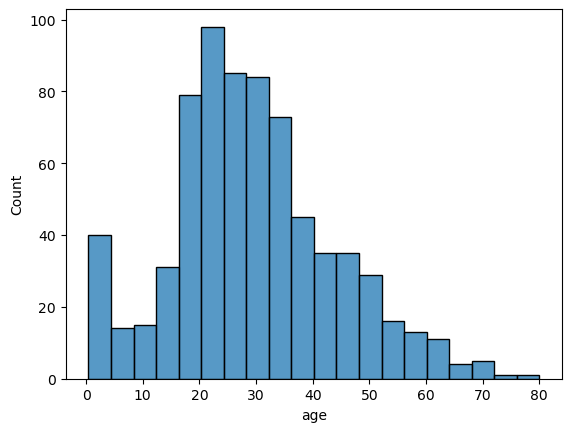

In [30]:
sns.histplot(x=df['age'], data=df)

In [35]:
cat_cols = df.select_dtypes(['object', 'category', 'bool'])
cat_cols

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


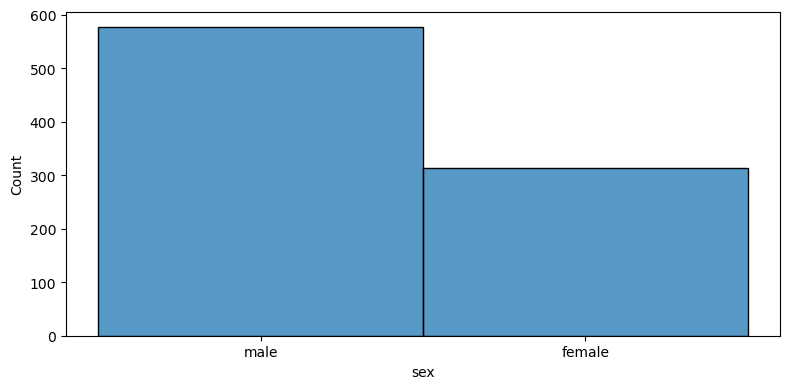

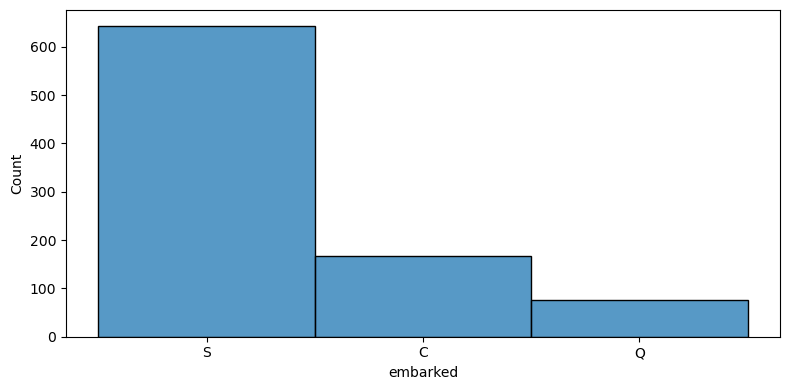

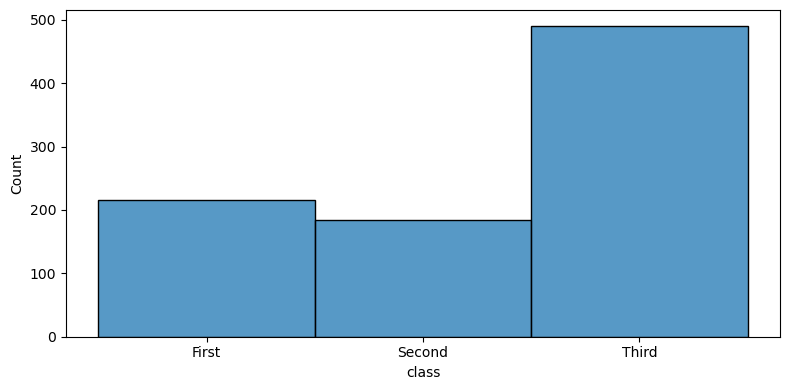

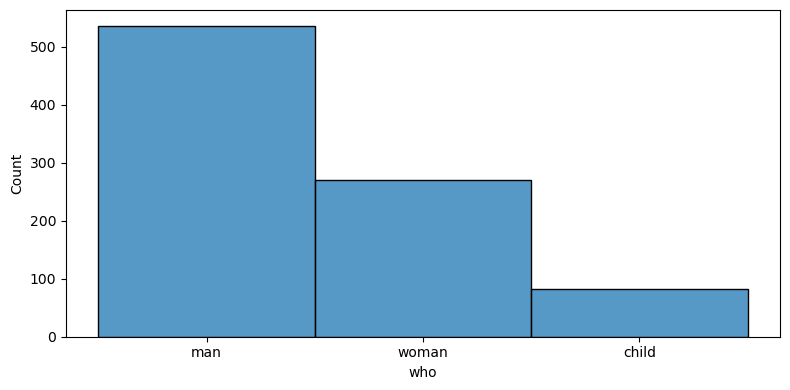

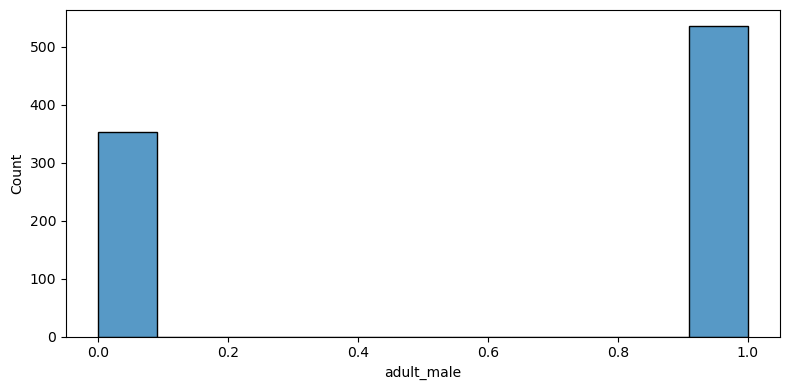

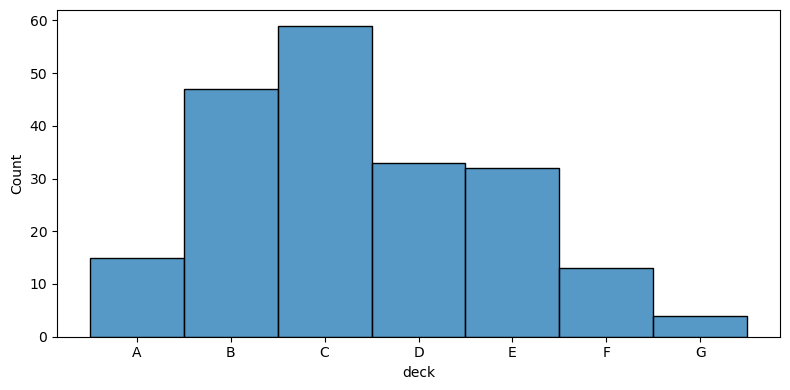

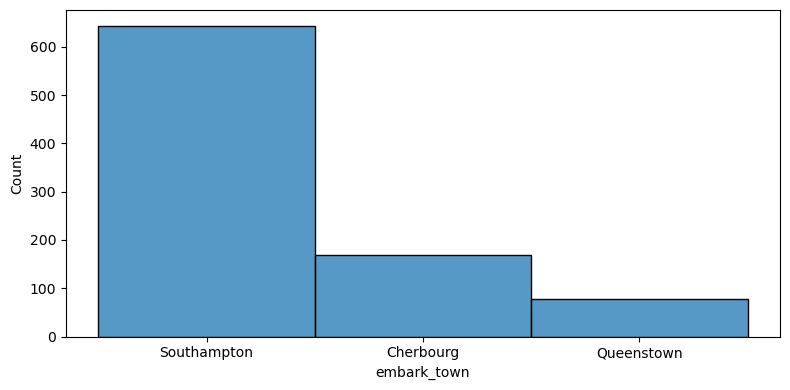

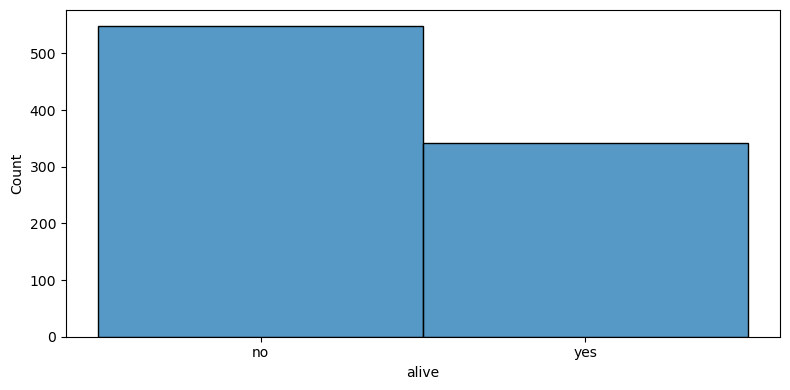

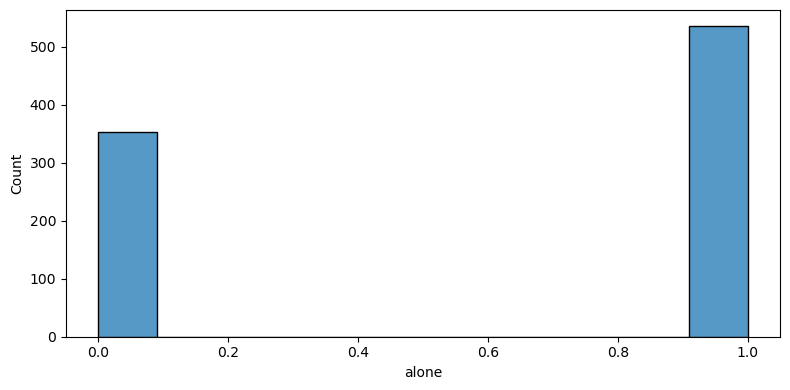

In [36]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col,data = df)
    plt.tight_layout()
    plt.show()

### ii. Bivariate Analysis

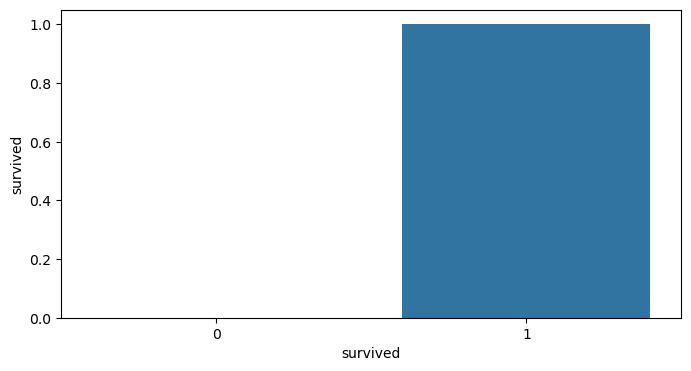

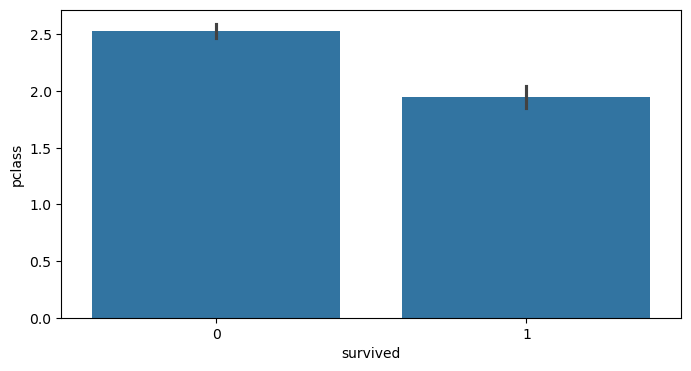

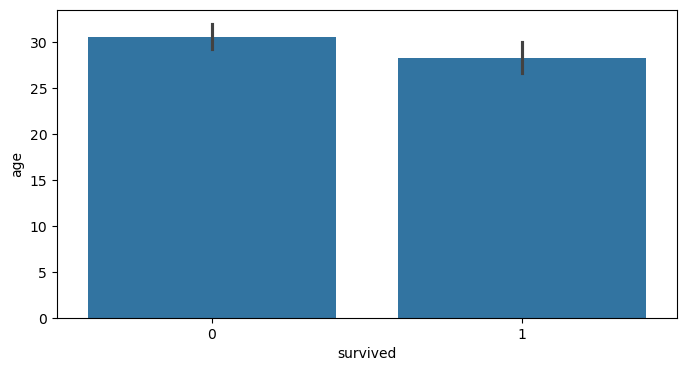

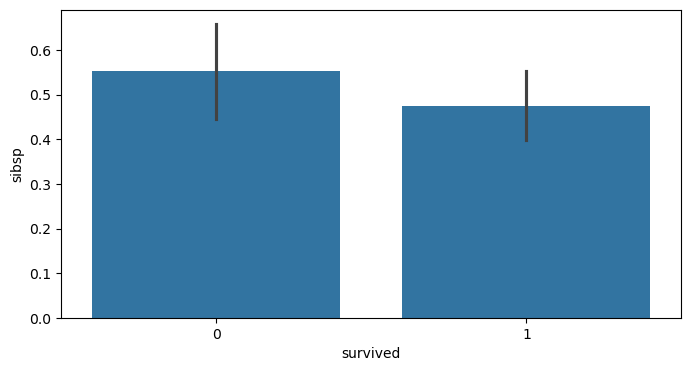

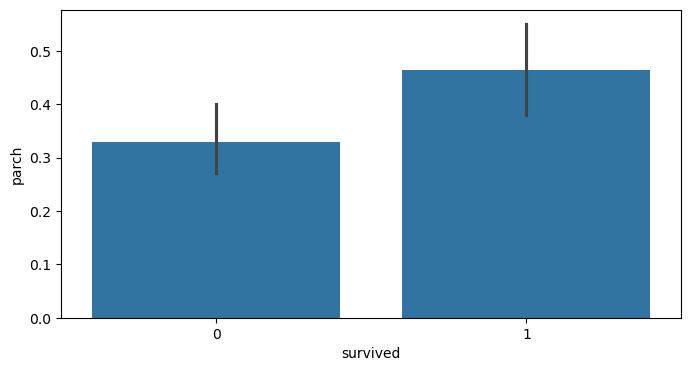

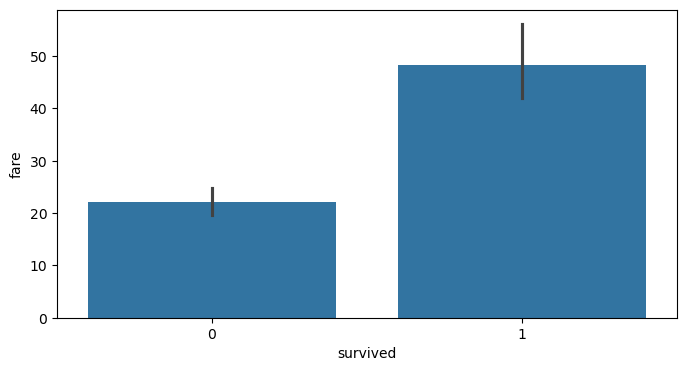

In [42]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['survived'],y=col, data=df)
    plt.show()

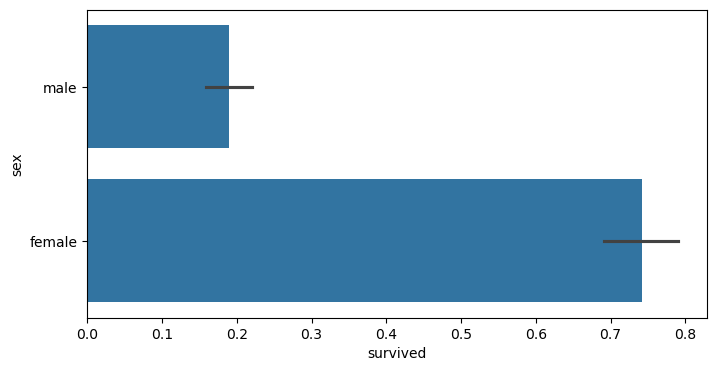

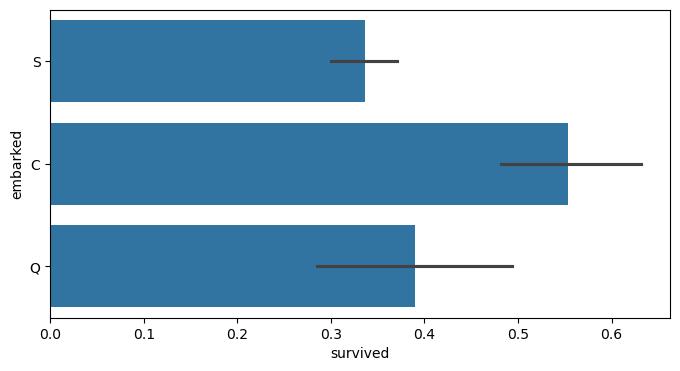

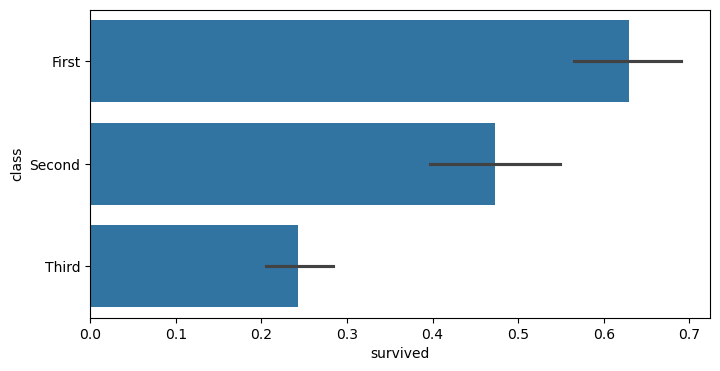

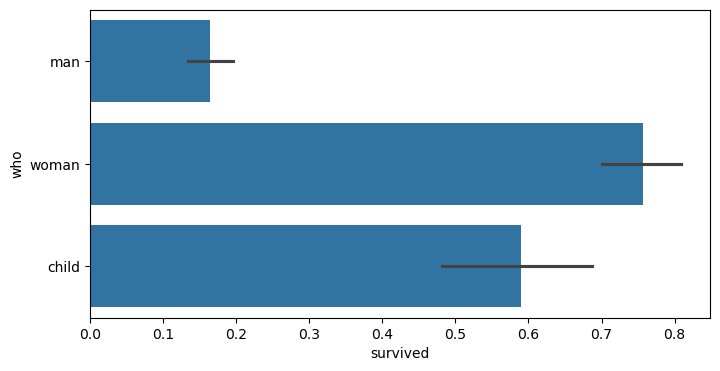

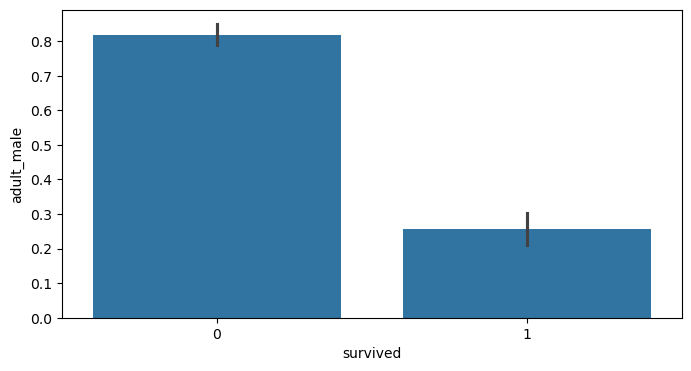

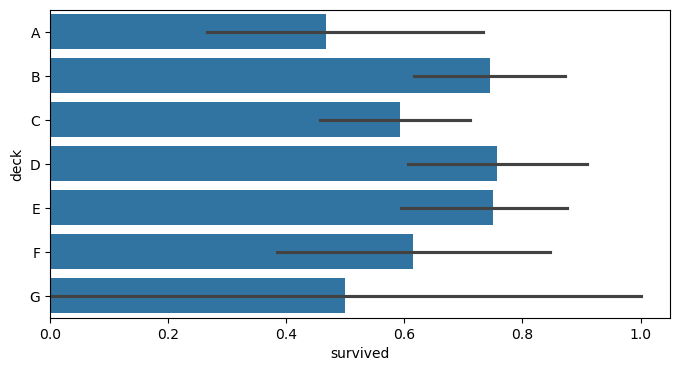

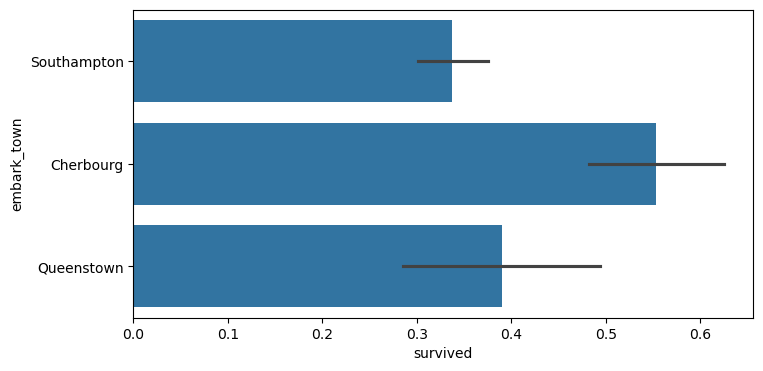

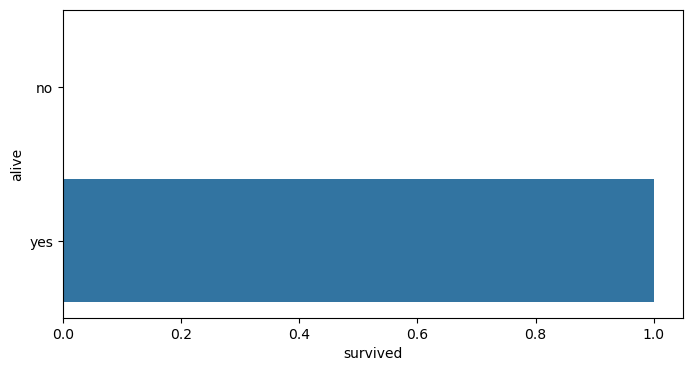

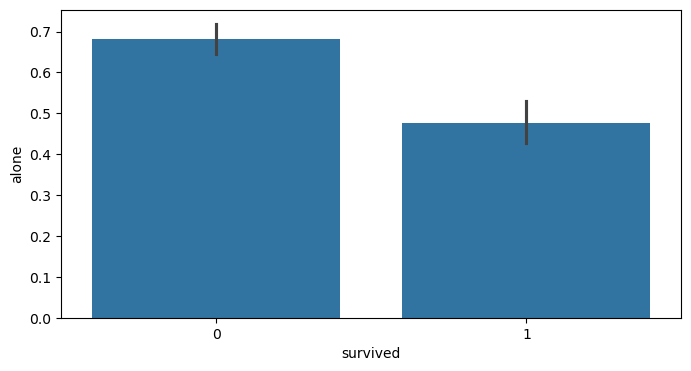

In [39]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=df['survived'],y=col, data=df)
    plt.show()

### iii. Multivariate Analysis

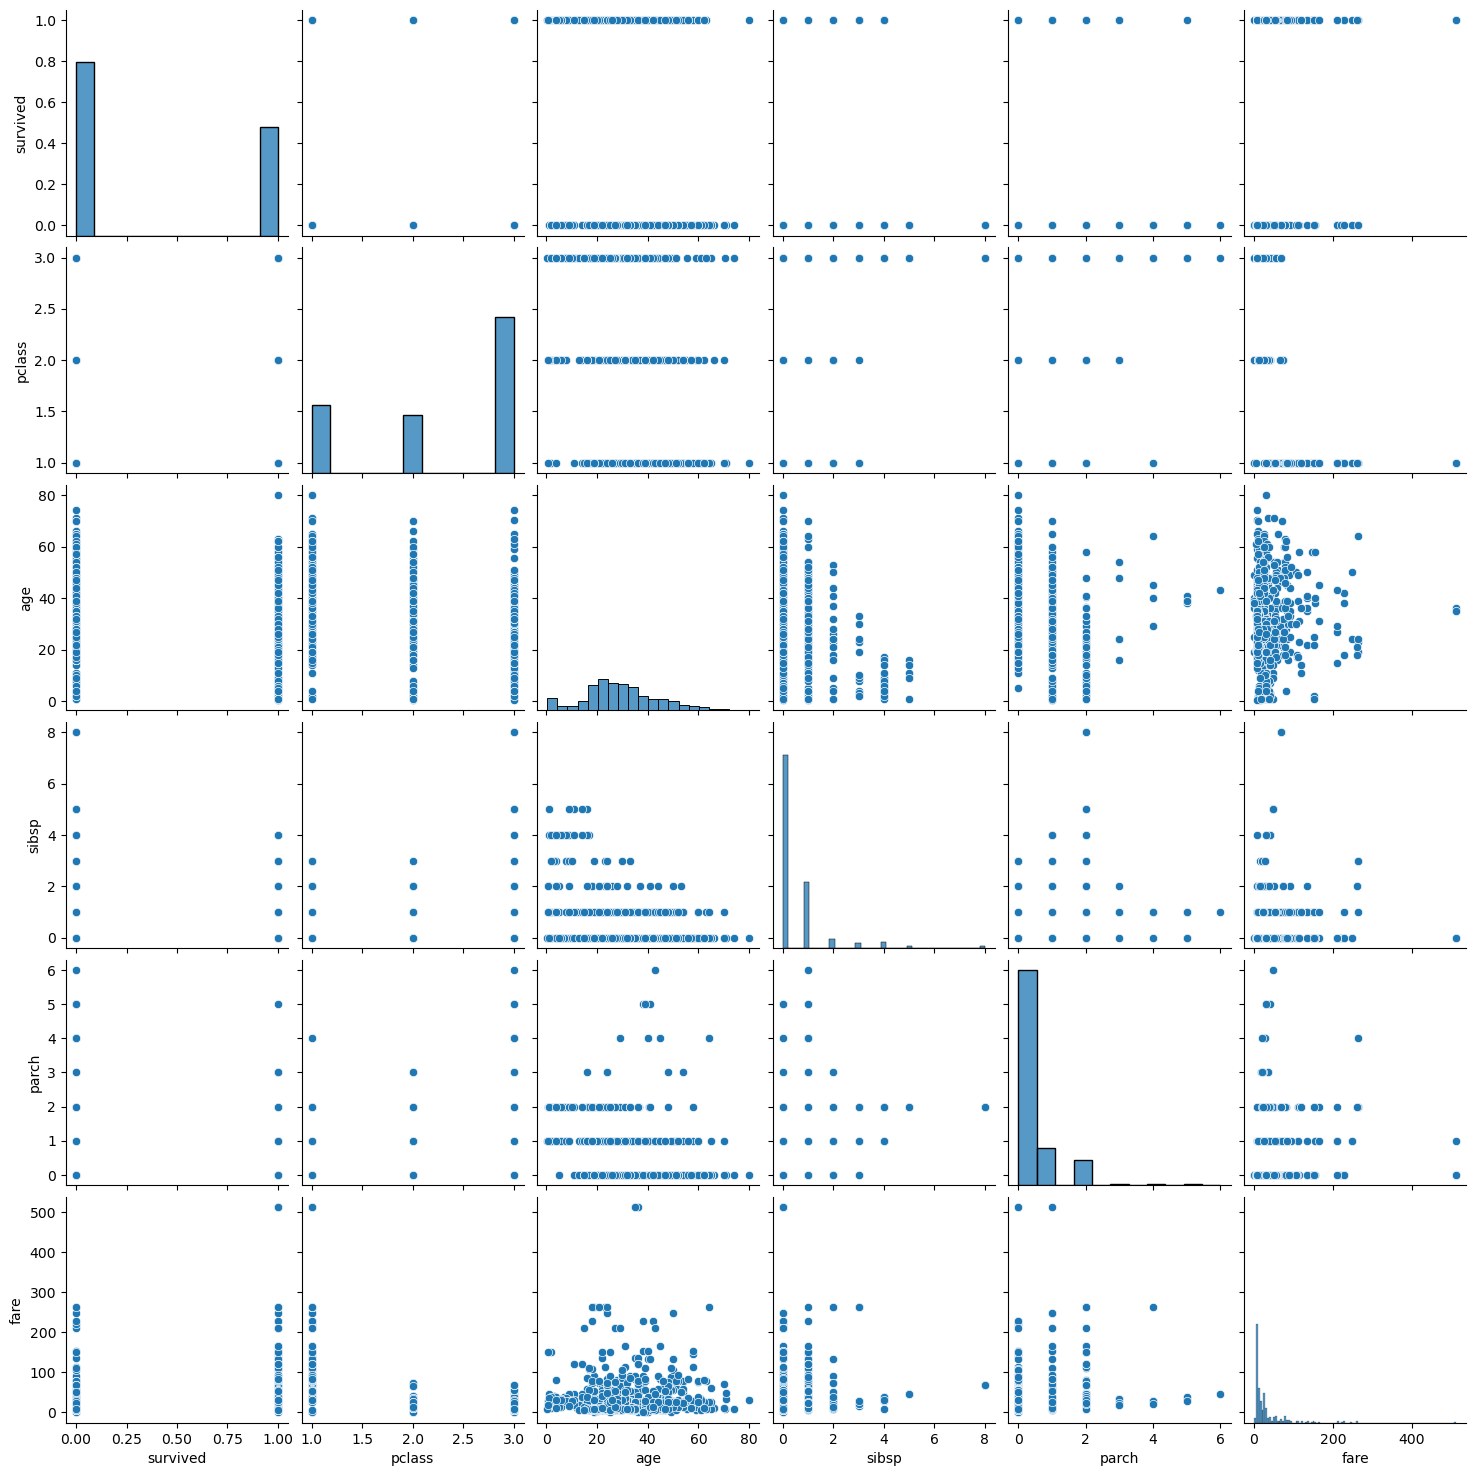

In [43]:
sns.pairplot(num_cols)

## 4. Data Preprocessing

### i. Handling Null values/Outliers

In [44]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [45]:
df['age'] = df['age'].fillna(df['age'].median())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [47]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [49]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [51]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [52]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [54]:
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [55]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

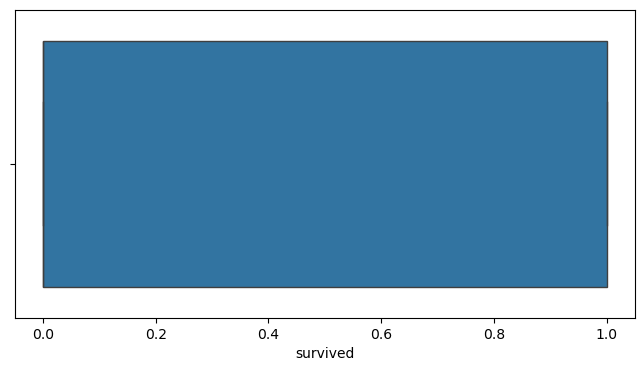

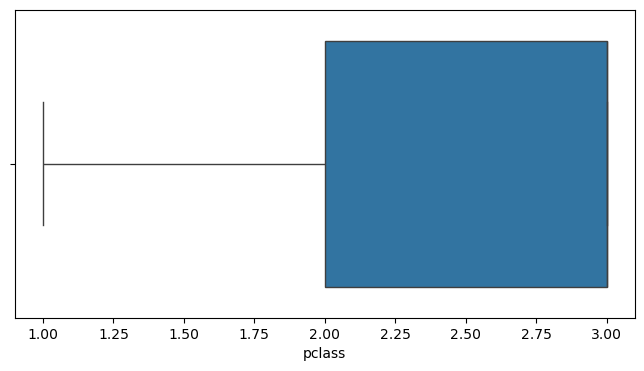

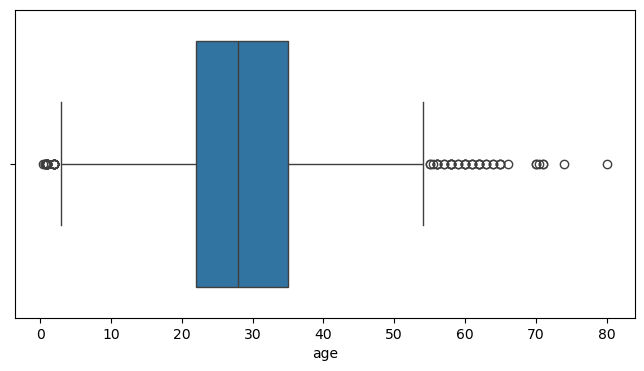

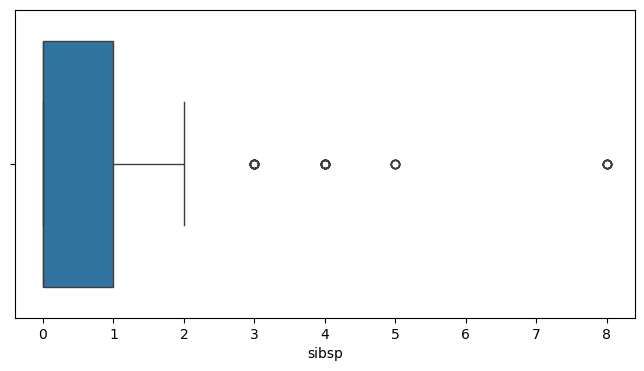

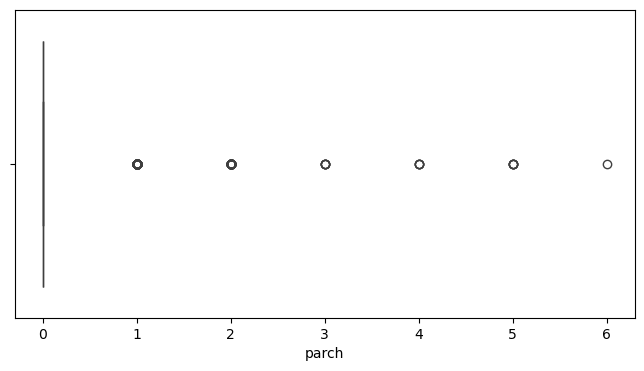

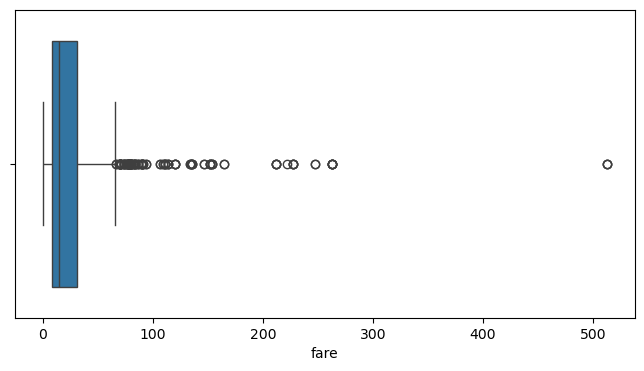

In [56]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col,data=df)
    plt.show()

In [58]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - iqr * 1.5
    ub = q3 + iqr * 1.5
    median = df[col].median()
    print(col)
    print("q1:", q1)
    print("q3:", q3)
    print("iqr:", iqr)
    print("lb:", lb)
    print("ub:", ub)
    print("median:", median)
    print("-------------------------------------------------------------------------------")

survived
q1: 0.0
q3: 1.0
iqr: 1.0
lb: -1.5
ub: 2.5
median: 0.0
-------------------------------------------------------------------------------
pclass
q1: 2.0
q3: 3.0
iqr: 1.0
lb: 0.5
ub: 4.5
median: 3.0
-------------------------------------------------------------------------------
age
q1: 22.0
q3: 35.0
iqr: 13.0
lb: 2.5
ub: 54.5
median: 28.0
-------------------------------------------------------------------------------
sibsp
q1: 0.0
q3: 1.0
iqr: 1.0
lb: -1.5
ub: 2.5
median: 0.0
-------------------------------------------------------------------------------
parch
q1: 0.0
q3: 0.0
iqr: 0.0
lb: 0.0
ub: 0.0
median: 0.0
-------------------------------------------------------------------------------
fare
q1: 7.9104
q3: 31.0
iqr: 23.0896
lb: -26.724
ub: 65.6344
median: 14.4542
-------------------------------------------------------------------------------


In [60]:
df.loc[(df['age'] < 2.5) | (df['age'] > 54.5), 'age'] = 28

In [65]:
df.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [66]:
df.loc[(df['sibsp'] > 2.5), 'sibsp'] = 0

In [67]:
df.parch.value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [69]:
df.loc[(df['fare'] > 65.6344), 'fare'] = 14.4542

### ii. Encoding

In [70]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,14.4542,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [72]:
df['embarked'].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [73]:
df.drop('class', axis=1,inplace=True)

In [74]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [75]:
df['deck'].value_counts()

deck
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [76]:
df.drop('embark_town', axis=1, inplace=True)

In [77]:
df.drop('alive', axis=1, inplace=True)

In [138]:
pd.pandas.set_option('display.max_columns', None)

In [148]:
df_encoded = pd.get_dummies(df, columns = ['embarked', 'who', 'deck'], drop_first=False, dtype=int)

In [149]:
df_encoded

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,3,male,22.0,1,0,7.2500,True,False,0,0,1,0,1,0,0,0,1,0,0,0,0
1,1,1,female,38.0,1,0,14.4542,False,False,1,0,0,0,0,1,0,0,1,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,False,True,0,0,1,0,0,1,0,0,1,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,False,False,0,0,1,0,0,1,0,0,1,0,0,0,0
4,0,3,male,35.0,0,0,8.0500,True,True,0,0,1,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,True,0,0,1,0,1,0,0,0,1,0,0,0,0
887,1,1,female,19.0,0,0,30.0000,False,True,0,0,1,0,0,1,0,1,0,0,0,0,0
888,0,3,female,28.0,1,2,23.4500,False,False,0,0,1,0,0,1,0,0,1,0,0,0,0
889,1,1,male,26.0,0,0,30.0000,True,True,1,0,0,0,1,0,0,0,1,0,0,0,0


In [143]:
df.embarked.value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [144]:
df.deck.value_counts()

deck
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

In [150]:
# ['embarked', 'who', 'deck']
df_encoded.drop(['embarked_Q', 'who_man', 'deck_G'], axis=1, inplace=True)
df_encoded

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_S,who_child,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F
0,0,3,male,22.0,1,0,7.2500,True,False,0,1,0,0,0,0,1,0,0,0
1,1,1,female,38.0,1,0,14.4542,False,False,1,0,0,1,0,0,1,0,0,0
2,1,3,female,26.0,0,0,7.9250,False,True,0,1,0,1,0,0,1,0,0,0
3,1,1,female,35.0,1,0,53.1000,False,False,0,1,0,1,0,0,1,0,0,0
4,0,3,male,35.0,0,0,8.0500,True,True,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,True,True,0,1,0,0,0,0,1,0,0,0
887,1,1,female,19.0,0,0,30.0000,False,True,0,1,0,1,0,1,0,0,0,0
888,0,3,female,28.0,1,2,23.4500,False,False,0,1,0,1,0,0,1,0,0,0
889,1,1,male,26.0,0,0,30.0000,True,True,1,0,0,0,0,0,1,0,0,0


In [151]:
from sklearn.preprocessing import OrdinalEncoder

# Sample columns to encode
ordinal_cols = ['sex', 'adult_male', 'alone']

# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
df_encoded[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])
df_encoded

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_S,who_child,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F
0,0,3,1.0,22.0,1,0,7.2500,1.0,0.0,0,1,0,0,0,0,1,0,0,0
1,1,1,0.0,38.0,1,0,14.4542,0.0,0.0,1,0,0,1,0,0,1,0,0,0
2,1,3,0.0,26.0,0,0,7.9250,0.0,1.0,0,1,0,1,0,0,1,0,0,0
3,1,1,0.0,35.0,1,0,53.1000,0.0,0.0,0,1,0,1,0,0,1,0,0,0
4,0,3,1.0,35.0,0,0,8.0500,1.0,1.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,1.0,1.0,0,1,0,0,0,0,1,0,0,0
887,1,1,0.0,19.0,0,0,30.0000,0.0,1.0,0,1,0,1,0,1,0,0,0,0
888,0,3,0.0,28.0,1,2,23.4500,0.0,0.0,0,1,0,1,0,0,1,0,0,0
889,1,1,1.0,26.0,0,0,30.0000,1.0,1.0,1,0,0,0,0,0,1,0,0,0


## 6. Feature Selection

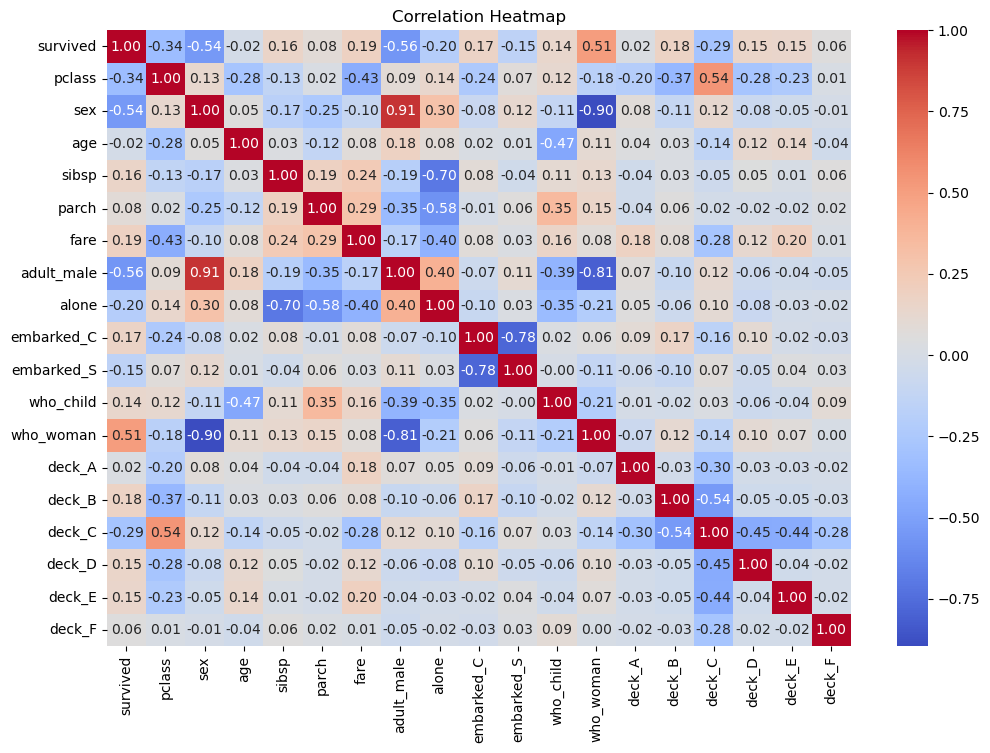

In [152]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 7. Feature Extraction

In [153]:
X = df_encoded.iloc[:,1:]

In [154]:
X

,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_S,who_child,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F
0,3,1.0,22.0,1,0,7.2500,1.0,0.0,0,1,0,0,0,0,1,0,0,0
1,1,0.0,38.0,1,0,14.4542,0.0,0.0,1,0,0,1,0,0,1,0,0,0
2,3,0.0,26.0,0,0,7.9250,0.0,1.0,0,1,0,1,0,0,1,0,0,0
3,1,0.0,35.0,1,0,53.1000,0.0,0.0,0,1,0,1,0,0,1,0,0,0
4,3,1.0,35.0,0,0,8.0500,1.0,1.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,1.0,1.0,0,1,0,0,0,0,1,0,0,0
887,1,0.0,19.0,0,0,30.0000,0.0,1.0,0,1,0,1,0,1,0,0,0,0
888,3,0.0,28.0,1,2,23.4500,0.0,0.0,0,1,0,1,0,0,1,0,0,0
889,1,1.0,26.0,0,0,30.0000,1.0,1.0,1,0,0,0,0,0,1,0,0,0


In [155]:
y = df_encoded[['survived']]
y

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


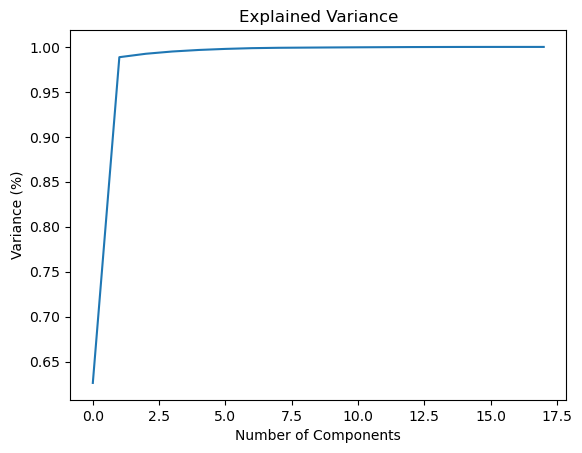

In [93]:
from sklearn.decomposition import PCA
pca = PCA()
pc=pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [99]:
np.where(np.cumsum(pca.explained_variance_ratio_)<=0.99)

(array([0, 1], dtype=int64),)

In [100]:
pca = PCA(n_components=2)
new_data = pca.fit_transform(df_encoded)

In [101]:
new_data

array([[-10.98553781,  -4.92275292],
       [ -1.43915367,   9.85282744],
       [ -9.73253849,  -1.08107838],
       ...,
       [  5.95665082,  -1.41240984],
       [ 12.12637061,  -4.260019  ],
       [ -9.0567093 ,   4.89967711]])

In [102]:

# This will be the new data fed to the algorithm.

# Column names pattern
column_names = [f'principal component {i}' for i in range(1,3)]

# Create DataFrame
principal_df = pd.DataFrame(data=new_data, columns=column_names)

In [103]:
principal_df

,principal component 1,principal component 2
0,-10.985538,-4.922753
1,-1.439154,9.852827
2,-9.732538,-1.081078
3,36.317910,1.227036
4,-8.316896,7.823097
...,...,...
886,-4.565370,-0.795171
887,11.130609,-11.198123
888,5.956651,-1.412410
889,12.126371,-4.260019


In [110]:
principal_df = pd.concat([principal_df, y.reset_index(drop=True)], axis=1)
principal_df

,principal component 1,principal component 2,survived
0,-10.985538,-4.922753,0
1,-1.439154,9.852827,1
2,-9.732538,-1.081078,1
3,36.317910,1.227036,1
4,-8.316896,7.823097,0
...,...,...,...
886,-4.565370,-0.795171,0
887,11.130609,-11.198123,1
888,5.956651,-1.412410,0
889,12.126371,-4.260019,1


## 8. Split the data

In [113]:
Xp = principal_df.drop('survived', axis=1)
Xp

,principal component 1,principal component 2
0,-10.985538,-4.922753
1,-1.439154,9.852827
2,-9.732538,-1.081078
3,36.317910,1.227036
4,-8.316896,7.823097
...,...,...
886,-4.565370,-0.795171
887,11.130609,-11.198123
888,5.956651,-1.412410
889,12.126371,-4.260019


In [114]:
yp = df[['survived']]
yp

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=1)

In [116]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 2)
y_train shape: (712, 1)
X_test shape: (179, 2)
y_test shape: (179, 1)


## 9. Fit the data to the model

In [127]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [128]:
y_predict = model.predict(X_test)

## 10. Model Evaluation

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Confusion Matrix\n", confusion_matrix(y_test, y_predict))
print("Accuracy Score", accuracy_score(y_test, y_predict))
print("Precision score", precision_score(y_test, y_predict))
print("Recall Score", recall_score(y_test, y_predict))
print("f1 score", f1_score(y_test, y_predict))

Confusion Matrix
 [[89 17]
 [22 51]]
Accuracy Score 0.7821229050279329
Precision score 0.75
Recall Score 0.6986301369863014
f1 score 0.723404255319149


## 11. Split the data to the model

In [156]:
X

,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_S,who_child,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F
0,3,1.0,22.0,1,0,7.2500,1.0,0.0,0,1,0,0,0,0,1,0,0,0
1,1,0.0,38.0,1,0,14.4542,0.0,0.0,1,0,0,1,0,0,1,0,0,0
2,3,0.0,26.0,0,0,7.9250,0.0,1.0,0,1,0,1,0,0,1,0,0,0
3,1,0.0,35.0,1,0,53.1000,0.0,0.0,0,1,0,1,0,0,1,0,0,0
4,3,1.0,35.0,0,0,8.0500,1.0,1.0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,1.0,1.0,0,1,0,0,0,0,1,0,0,0
887,1,0.0,19.0,0,0,30.0000,0.0,1.0,0,1,0,1,0,1,0,0,0,0
888,3,0.0,28.0,1,2,23.4500,0.0,0.0,0,1,0,1,0,0,1,0,0,0
889,1,1.0,26.0,0,0,30.0000,1.0,1.0,1,0,0,0,0,0,1,0,0,0


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [158]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 18)
y_train shape: (712, 1)
X_test shape: (179, 18)
y_test shape: (179, 1)


## 11. Fit the model to the data

In [159]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [160]:
y_predict = model.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
print("Confusion Matrix\n", confusion_matrix(y_test, y_predict))
print("Accuracy Score", accuracy_score(y_test, y_predict))
print("Precision score", precision_score(y_test, y_predict))
print("Recall Score", recall_score(y_test, y_predict))
print("f1 score", f1_score(y_test, y_predict))

Confusion Matrix
 [[87 19]
 [22 51]]
Accuracy Score 0.770949720670391
Precision score 0.7285714285714285
Recall Score 0.6986301369863014
f1 score 0.7132867132867133
